# Global plastic usage: future impact awareness

importing the library to start analyzing the dataset:

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset= pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv")

In [3]:
print("The data set has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))
display(dataset.describe())
display(dataset.head())
display(dataset.dtypes.value_counts())

The data set has 48168 rows and 7 columns


,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)"
count,48168.000000,186.000000,6407.000000,4.688300e+04
mean,1903.147442,0.179812,14926.095591,2.982790e+07
std,315.716839,0.123006,17739.754531,2.530860e+08
min,-10000.000000,0.010000,247.436540,9.050000e+02
25%,1859.000000,0.103000,3021.071807,2.017335e+05
50%,1920.000000,0.144000,8447.264179,1.542937e+06
75%,1975.000000,0.252000,19607.537075,5.886795e+06
max,2019.000000,0.686000,135318.754421,7.713468e+09


,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


object     3
float64    3
int64      1
Name: count, dtype: int64

In [4]:
dataset.shape

(48168, 7)

 To have summary of the dataset with the informations about the types in each column, how many non-null values I use the function info()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


It needs to be checked how are our values into the dataset, are them object? integers? Float? to do so we will use the function .dtypes. This step helps to understand which type of values we are having in our dataset to be considered and if needed any additional action:

In [6]:
dataset.dtypes

Entity                                                  object
Code                                                    object
Year                                                     int64
Per capita plastic waste (kg/person/day)               float64
GDP per capita, PPP (constant 2011 international $)    float64
Total population (Gapminder, HYDE & UN)                float64
Continent                                               object
dtype: object

In [7]:
dataset.head(300)

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
295,Africa,NaN,1972,NaN,NaN,382838016.0,NaN
296,Africa,NaN,1973,NaN,NaN,393044000.0,NaN
297,Africa,NaN,1974,NaN,NaN,403646016.0,NaN
298,Africa,NaN,1975,NaN,NaN,414675008.0,NaN


Noticing that the columns are having brackets for convinience they are renamed: 

In [8]:
dataset.rename(columns={'Per capita plastic waste (kg/person/day)': 'capita plastic waste'}, inplace=True)

In [9]:
dataset.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita'}, inplace=True)

In [10]:
dataset.rename(columns={'Total population (Gapminder, HYDE & UN)': 'Total population'}, inplace=True)

The dataset could have duplicated value. With the following function it if they are duplicates or not: 

In [11]:
dataset.duplicated().sum() 

0

In order to proceed with the data cleaning it needs to be showed the missing values present for each column with the function isnull().sum()

In [12]:
dataset.isnull().sum()

Entity                      0
Code                     2014
Year                        0
capita plastic waste    47982
GDP per capita          41761
Total population         1285
Continent               47883
dtype: int64

Entity and year have 0 missing value but the others have quite a lot. To check the total in the dataset of the missing value it is used the following function: 

In [13]:
dataset.isnull().sum().sum()

140925

In [14]:
dataset.head()

,Entity,Code,Year,capita plastic waste,GDP per capita,Total population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


# Visualization of missing values

Importing the Python library "missingno"  helps to visualize and analyze missing data in the datasets. it allows to  quickly understand and visualize missing values:

In [15]:
pip install missingno

To identity the location of the missing data within the dataset it has been used the matric plot:

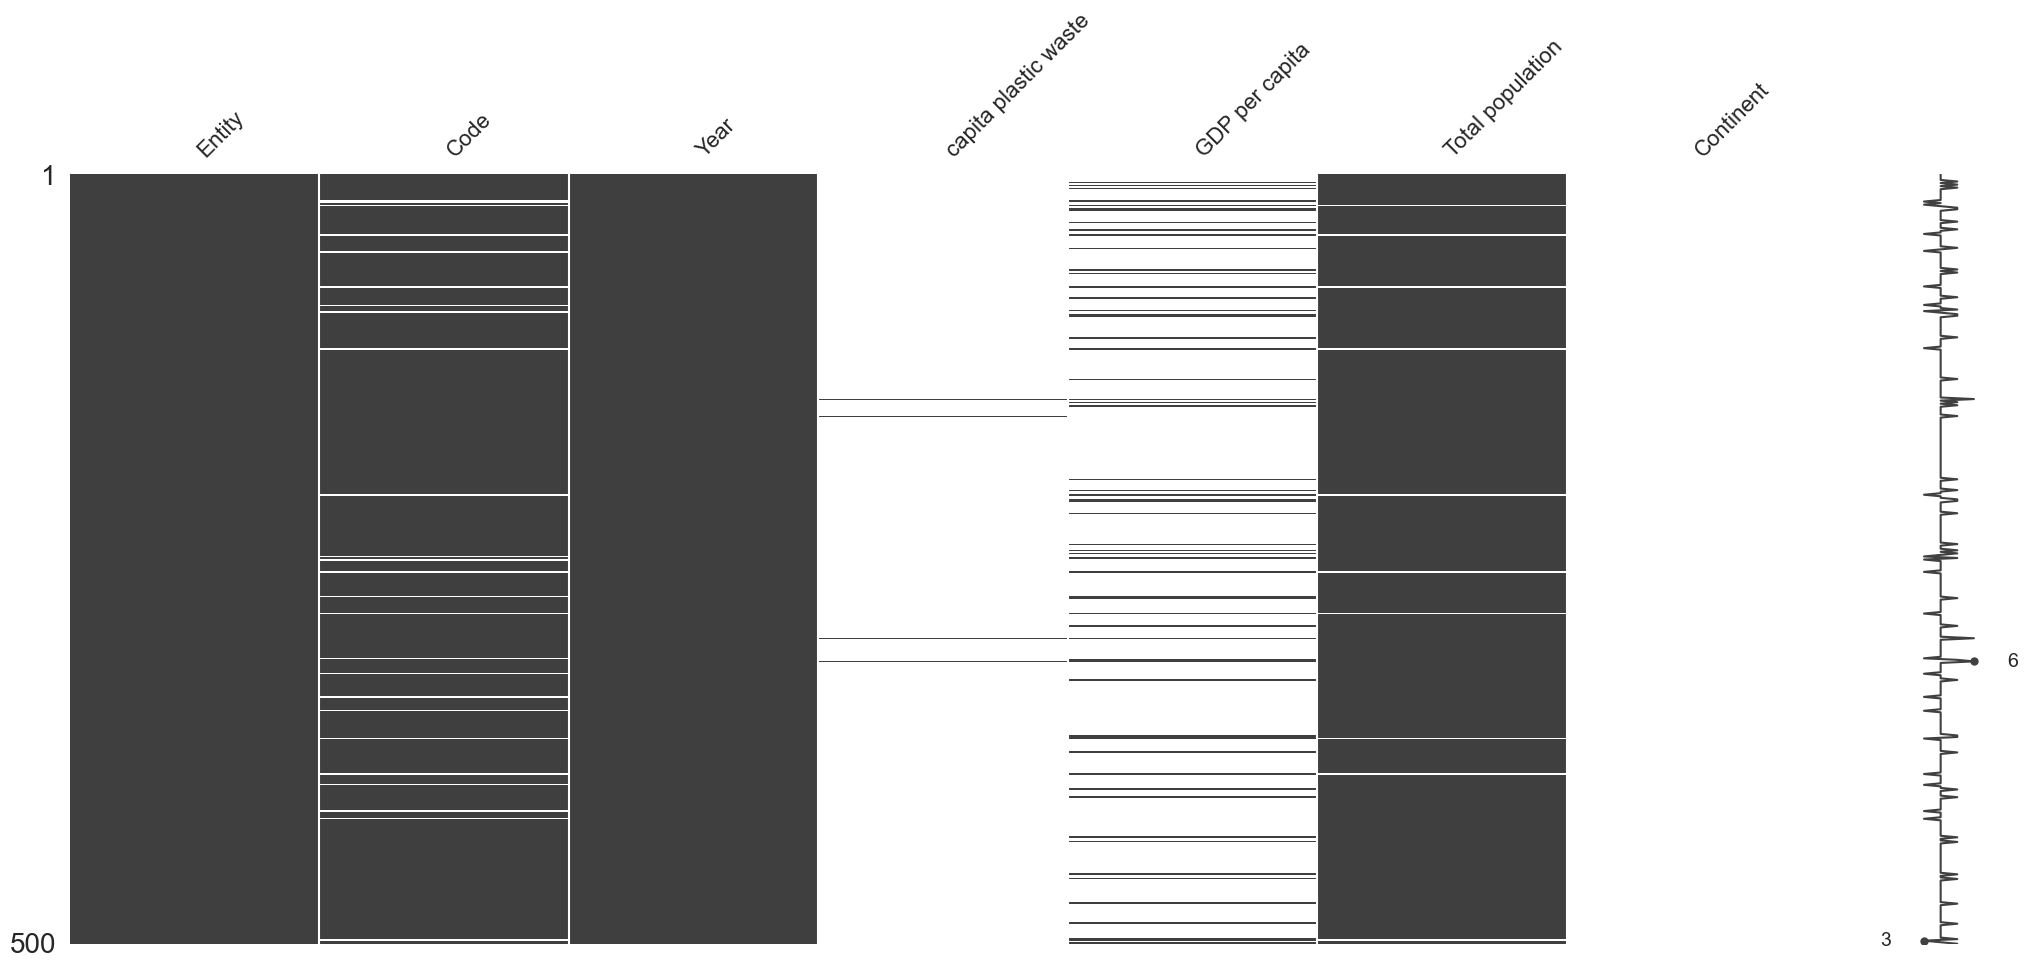

In [16]:
import missingno as msno

ax = msno.matrix(dataset.sample(500))

The heatmap shows the correlation between missing values across different columns. This help understand the relationship inside the missing values inside different columns, if there is any: 

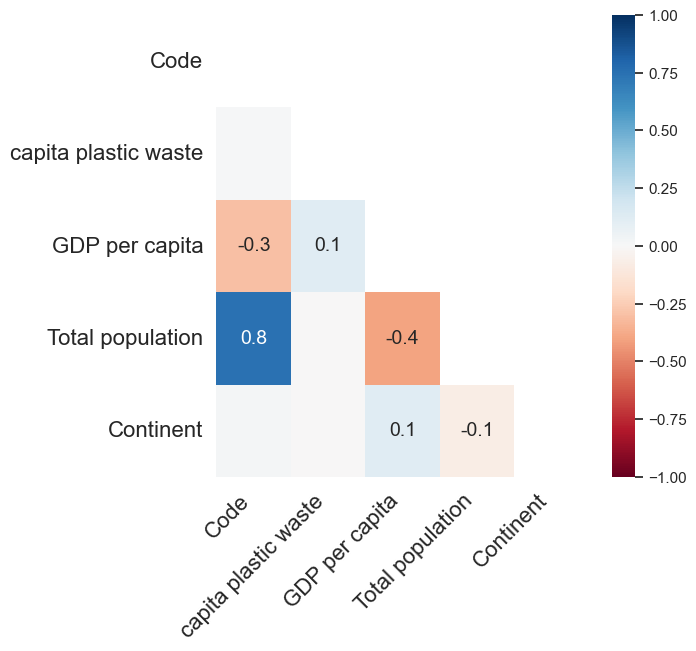

In [17]:
ax = msno.heatmap(dataset, figsize=(6, 6))

Thanks to the dendrogram it is identified groups of columns that have similar patterns of the missing value:

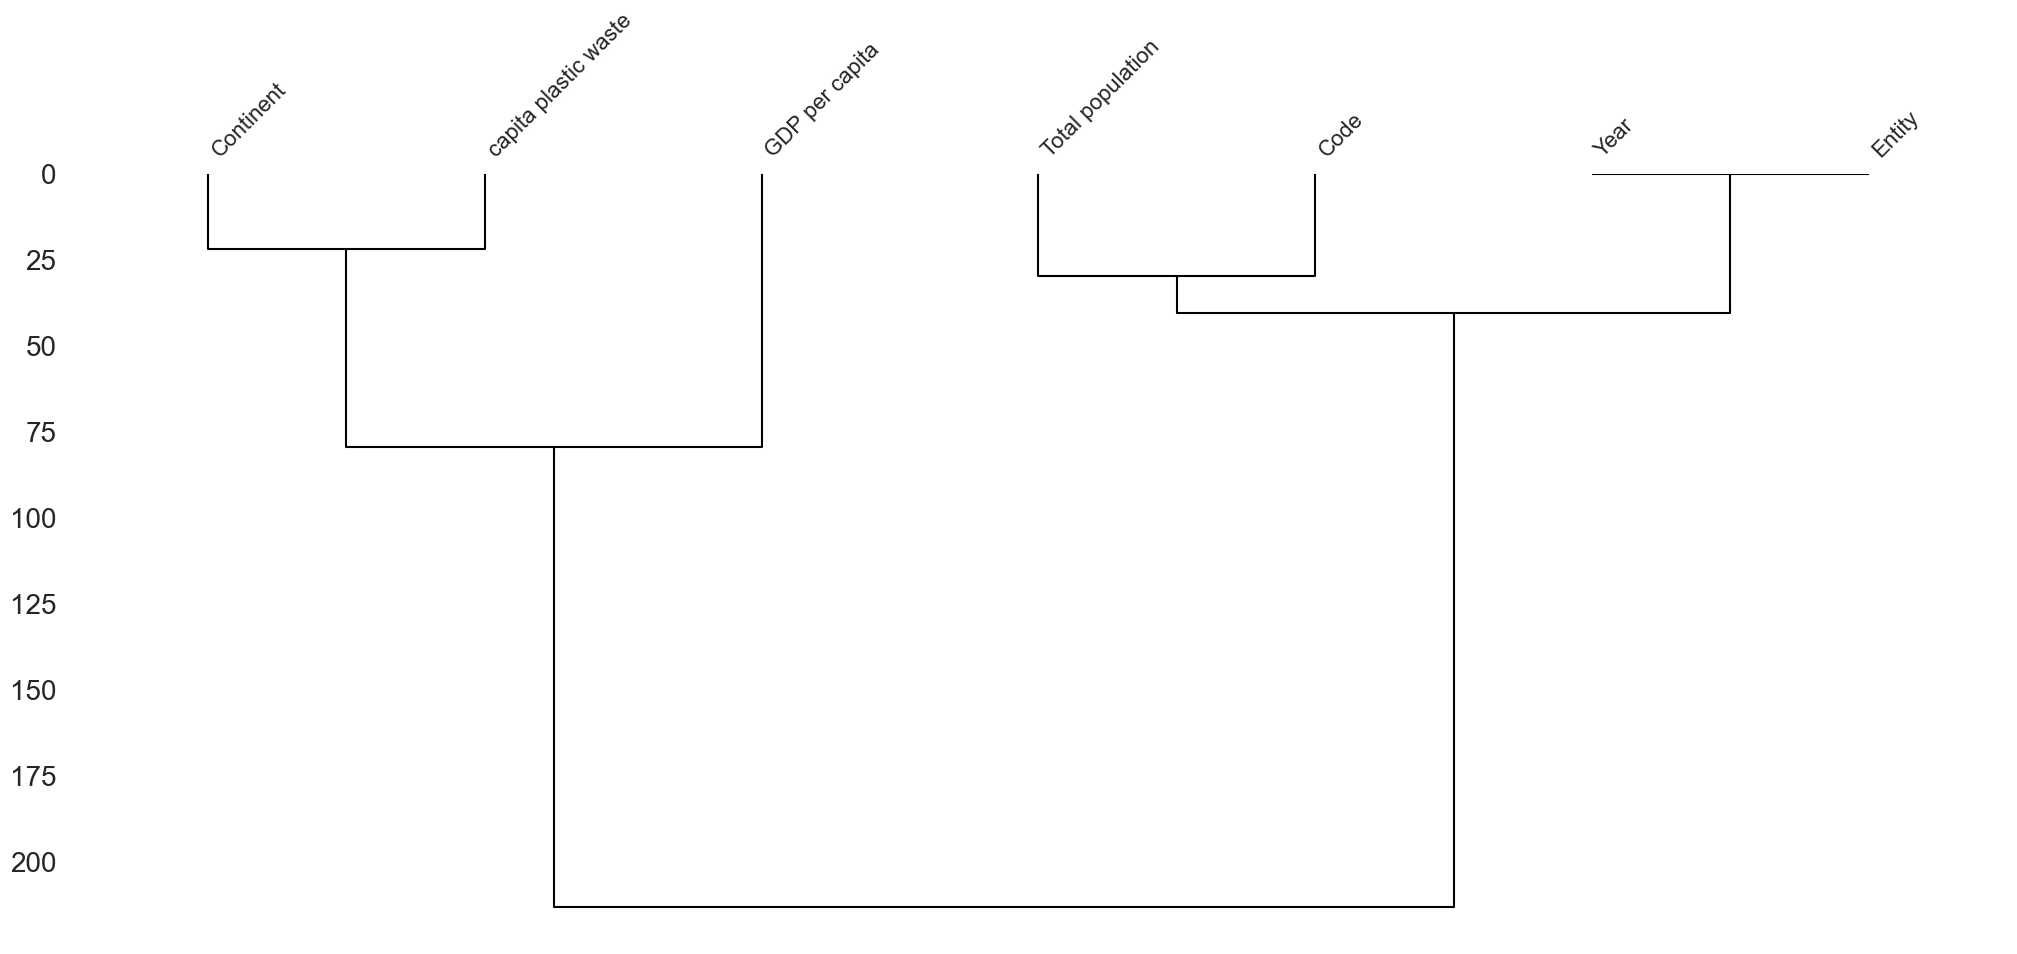

In [18]:
ax = msno.dendrogram(dataset)

# Visualization:

Visualization in this point it is cruciual to see the pattern and understand the dataset before start working on the missing values of the dataset. This is important to see the categorical values and have a general overview of the situation

In [19]:
print(dataset['Continent'])

0          Asia
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
48163       NaN
48164       NaN
48165       NaN
48166       NaN
48167    Europe
Name: Continent, Length: 48168, dtype: object


The continent it is an imput variable in the analysis due that the final scope of the project is to show the global plastic usage to bring awareness for future years. The pie chart shows the distribution of the data based on the "Continent" column:

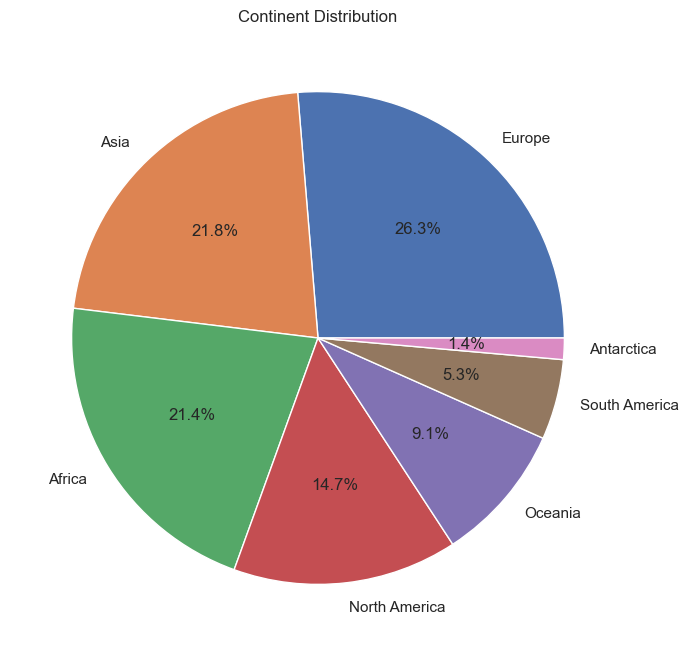

In [20]:
continent_counts = dataset['Continent'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%')
plt.title('Continent Distribution')
plt.show()

it is noticable that Africa, Asia and Europe are the majority of the analysis in the research.

histogram that visualizes the distribution of per capita plastic waste data from a dataset:

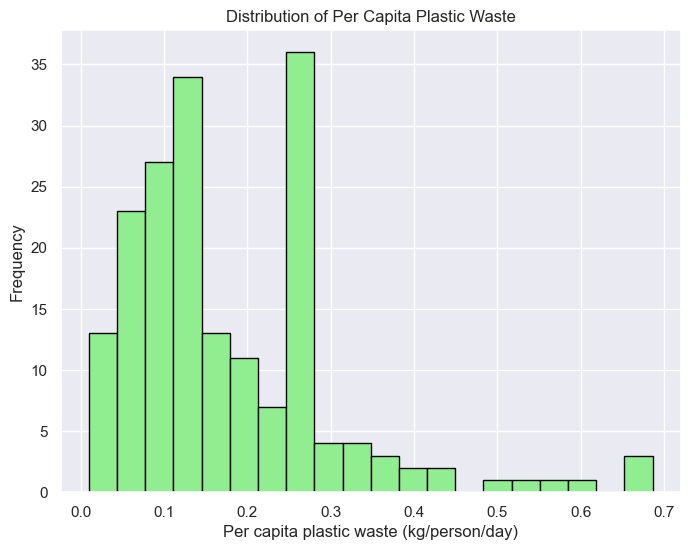

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(dataset['capita plastic waste'], bins=20, color='lightgreen', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Per Capita Plastic Waste')
plt.xlabel('Per capita plastic waste (kg/person/day)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

check for outliners in the dataset: Noxplot for capita plastic waste feature.

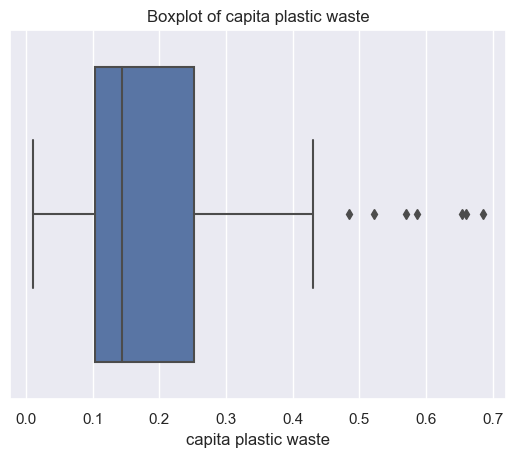

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=dataset['capita plastic waste'])
plt.title('Boxplot of capita plastic waste')
plt.show()

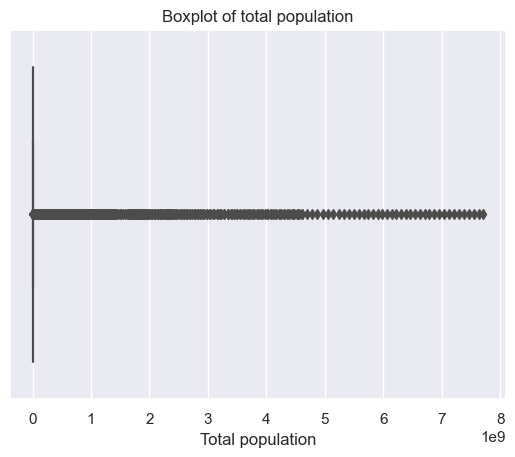

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=dataset['Total population'])
plt.title('Boxplot of total population')
plt.show()

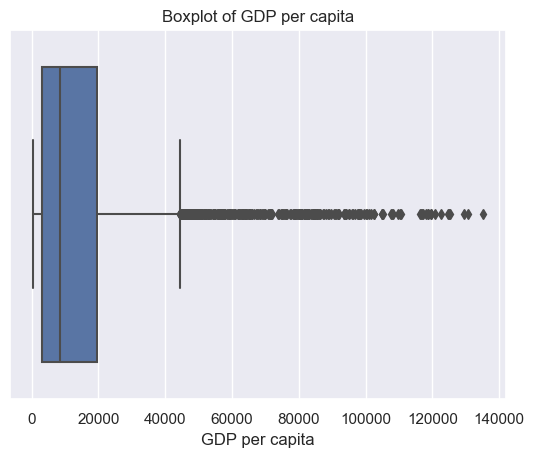

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=dataset['GDP per capita'])
plt.title('Boxplot of GDP per capita')
plt.show()

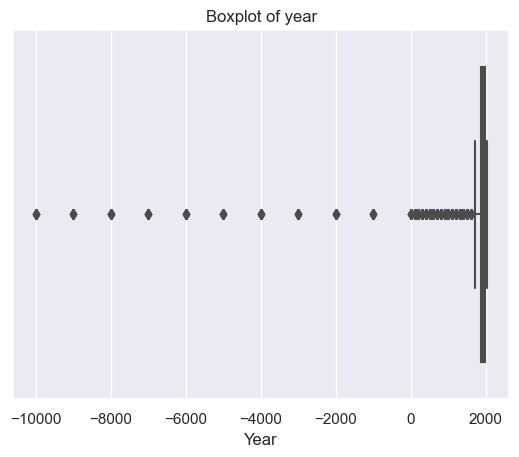

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=dataset['Year'])
plt.title('Boxplot of year')
plt.show()

# Handling Missing Values:

To handle the missing value:

In [26]:
missing_values=["NA","N/A","-","NaN","missing","na","?"]

In [27]:
dataset.head()

,Entity,Code,Year,capita plastic waste,GDP per capita,Total population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


LabelEncoder library transform the categorical value into numerical value so the analysis of the dataset can continue without encountering problems

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
cn1 = list(dataset['Entity'].values)
le.fit(list(set(cn1)))
num_cn1 = list(le.transform(cn1))
dataset['Entity'] = num_cn1

le = LabelEncoder()
cn2 = list(dataset['Code'].values)
le.fit(list(set(cn2)))
num_cn2 = list(le.transform(cn2))
dataset['Code'] = num_cn2

le = LabelEncoder()
cn3 = list(dataset['Continent'].values)
le.fit(list(set(cn3)))
num_cn3 = list(le.transform(cn3))
dataset['Continent'] = num_cn3

Once the categorical value are encoded and transformed into numerical it can be checked for outliners: 

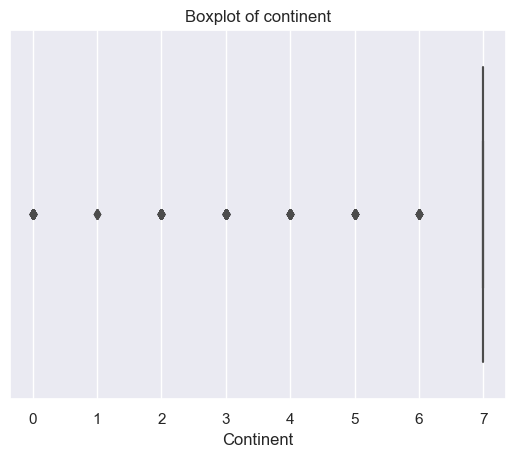

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=dataset['Continent'])
plt.title('Boxplot of continent')
plt.show()

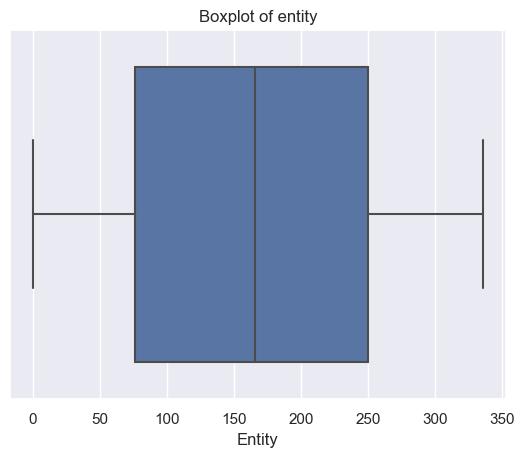

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=dataset['Entity'])
plt.title('Boxplot of entity')
plt.show()

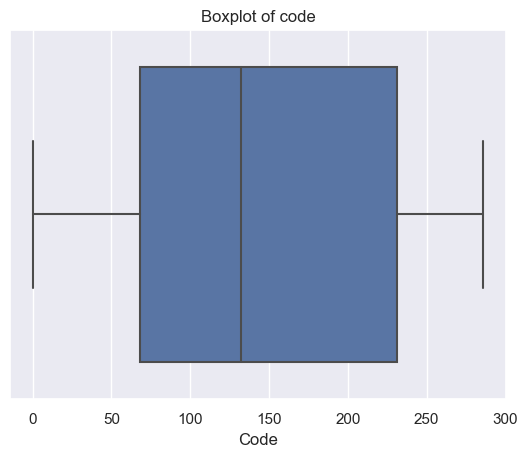

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=dataset['Code'])
plt.title('Boxplot of code')
plt.show()

Fill every column with the median will transfor every numerical values. Year for example it is not necessary to fill the year and Entity because the missing value are 0 so it could be left as it is: 

In [33]:
columns_to_fill = ['Code', 'capita plastic waste', 'GDP per capita', 'Total population', 'Continent']

dataset[columns_to_fill] = dataset[columns_to_fill].fillna(dataset[columns_to_fill].median())

In [34]:
dataset.head()

,Entity,Code,Year,capita plastic waste,GDP per capita,Total population,Continent
0,0,173,2015,0.144,8447.264179,1542937.0,2
1,1,1,2002,0.144,1063.635574,22601000.0,7
2,1,1,2003,0.144,1099.194507,23681000.0,7
3,1,1,2004,0.144,1062.249360,24727000.0,7
4,1,1,2005,0.144,1136.123214,25654000.0,7


In [35]:
dataset.isnull().sum()

Entity                  0
Code                    0
Year                    0
capita plastic waste    0
GDP per capita          0
Total population        0
Continent               0
dtype: int64

Our target variable is the 'capita plastic waste' and it needs to be analyzed the correlation between this and all the all other columns in the dataset, sorted in descending order. Positive values closer to 1 indicate a strong positive linear relationship, negative values closer to -1 indicate a strong negative linear relationship, and values closer to 0 indicate a weaker or no linear relationship.
This helps understand how strong is the correlation and this is crucial for the modelling, in particular to identify factor or features inside the dataset.

In [36]:
correlation_matrix = dataset.corr()
print(correlation_matrix['capita plastic waste'].sort_values(ascending=False))

capita plastic waste    1.000000
GDP per capita          0.067068
Year                    0.005894
Continent               0.001249
Entity                 -0.000227
Total population       -0.003892
Code                   -0.004517
Name: capita plastic waste, dtype: float64


<Axes: >

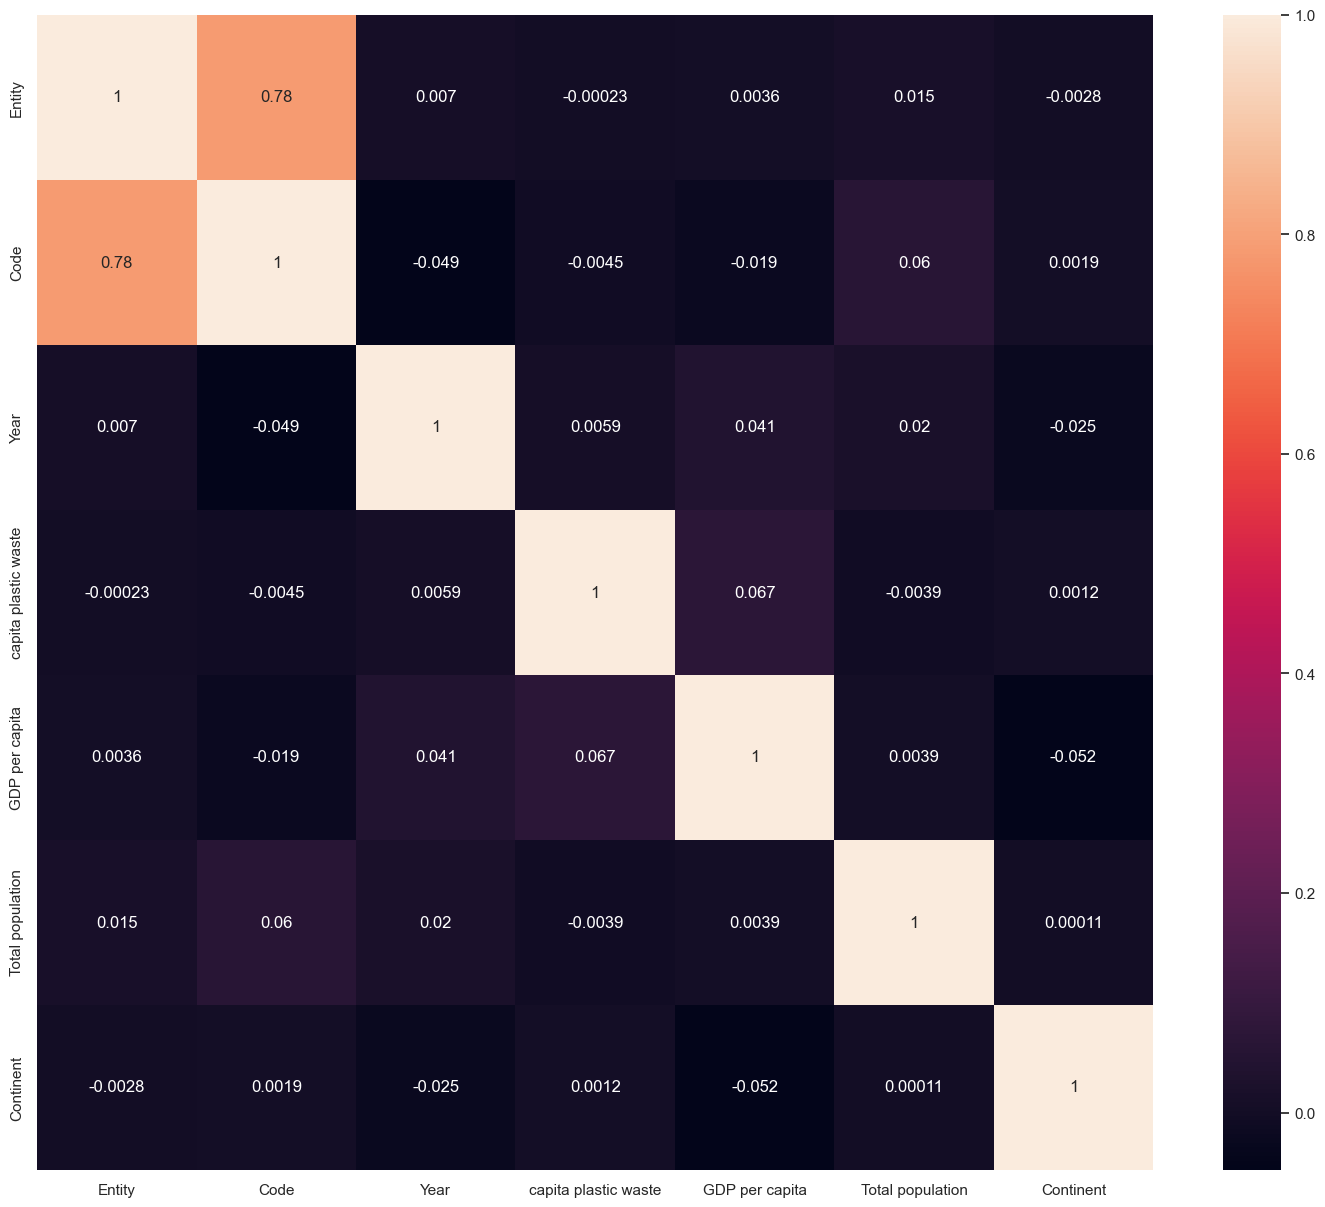

In [37]:
plt.figure(figsize = (18,15))
sns.heatmap(dataset.corr() , annot = True)

# Modelling: 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

It has been considered Capita Plastic Waste and Continent where X for the target variable is "Capita Plastic Waste" and the input variable Y is continent

# Random Forest

the 10% to avoid overfitting

In [39]:
X = dataset.drop('capita plastic waste', axis=1)
y = dataset['Continent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [40]:

from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 1000)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 1.0
Accuracy: 1.00


Random forest for 20% split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 1000)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [44]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 1.0
Accuracy: 1.00


Random forest application 30% split: 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators = 1000)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [47]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 1.0
Accuracy: 1.00


# Application of Decison tree model:

In [48]:
from sklearn.tree import DecisionTreeClassifier       
from sklearn.model_selection import train_test_split  
from sklearn import metrics                          
from sklearn import tree

import warnings
warnings.filterwarnings('ignore') 

In [49]:

feature_cols = ['capita plastic waste']
X = dataset[feature_cols]               
y = dataset['Continent']                     


print(X, y)

       capita plastic waste
0                     0.144
1                     0.144
2                     0.144
3                     0.144
4                     0.144
...                     ...
48163                 0.144
48164                 0.144
48165                 0.144
48166                 0.144
48167                 0.144

[48168 rows x 1 columns] 0        2
1        7
2        7
3        7
4        7
        ..
48163    7
48164    7
48165    7
48166    7
48167    3
Name: Continent, Length: 48168, dtype: int32


training split of 10%

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9929416649366826
Accuracy: 0.99


trainign split of 20%

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9938758563421216
Accuracy: 0.99


30%

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9939796553871705
Accuracy: 0.99


Due that the project tends to bring awareness to the plastic and the usage for the future it has been tested as input variable also Year. It has been tested on 10 % splitting model to see how it is

In [53]:
X = dataset.drop('capita plastic waste', axis=1)
y = dataset['Year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.0056051484326344195
Classification Report:
               precision    recall  f1-score   support

       -9000       0.00      0.00      0.00         1
       -3000       0.00      0.00      0.00         1
       -1000       0.00      0.00      0.00         1
           0       0.00      0.00      0.00         1
         200       0.00      0.00      0.00         3
         300       0.00      0.00      0.00         2
         500       0.00      0.00      0.00         2
         700       0.00      0.00      0.00         1
         900       0.00      0.00      0.00         1
        1000       0.00      0.00      0.00         1
        1200       0.00      0.00      0.00         3
        1400       0.00      0.00      0.00         1
        1710       0.00      0.00      0.00         1
        1730       0.00      0.00      0.00         1
        1740       0.00      0.00      0.00         1
        1750       0.00      0.00      0.00         1
     

In [55]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.29188291467718497
Classification Report:
               precision    recall  f1-score   support

      -10000       0.00      0.00      0.00         0
       -9000       0.00      0.00      0.00         1
       -3000       0.00      0.00      0.00         1
       -2000       0.00      0.00      0.00         0
       -1000       0.00      0.00      0.00         1
           0       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         0
         200       0.00      0.00      0.00         3
         300       0.00      0.00      0.00         2
         400       0.00      0.00      0.00         0
         500       0.00      0.00      0.00         2
         600       0.00      0.00      0.00         0
         700       0.00      0.00      0.00         1
         800       0.00      0.00      0.00         0
         900       0.00      0.00      0.00         1
        1000       0.00      0.00      0.00         1
        1100

In [56]:
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Random Forest Accuracy:", accuracy_rf)

Logistic Regression Accuracy: 0.0056051484326344195
Random Forest Accuracy: 0.29188291467718497
